# Prototype for the function that generates the PA values for the agents

Last update: 25/01/2018

In [1]:
import json
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import os
import random
import re
%matplotlib inline

In [2]:
data_f='./data/'
fitbit = pd.read_csv(data_f+'fitbit.csv', sep=';', header=0)

In [3]:
fitbit.head()

,School,Class,Wave,Child_Bosse,Day,Gender,Age,Steps,Minutes_MVPA,Steps_ML_imp1,Minutes_MVPA_ML_imp1,imputed,Start,Finish,Date
0,22,52.0,1,648,5,1,12,NaN,NaN,NaN,NaN,NaN,2016-01-27,2016-02-02,2016-02-01
1,22,52.0,1,643,2,1,13,NaN,NaN,7624.0,31.0,1.0,2016-01-27,2016-02-02,2016-01-29
2,22,52.0,1,643,1,1,13,NaN,NaN,13617.0,70.0,1.0,2016-01-27,2016-02-02,2016-01-28
3,22,52.0,1,650,3,0,12,3320.0,0.0,3320.0,0.0,0.0,2016-01-27,2016-02-02,2016-01-30
4,22,52.0,1,643,5,1,13,NaN,NaN,NaN,NaN,NaN,2016-01-27,2016-02-02,2016-02-01


In [4]:
fitbit.groupby(['Wave', 'Day']).count()

School  Class  Child_Bosse  Gender  Age  Steps  Minutes_MVPA  \
Wave Day                                                                 
1    1       953    927          953     953  953    518           518   
     2       953    927          953     953  953    447           447   
     3       953    927          953     953  953    395           395   
     4       953    927          953     953  953    309           309   
     5       953    927          953     953  953    174           174   
2    1       953    927          953     953  953    608           608   
     2       953    927          953     953  953    544           544   
     3       953    927          953     953  953    468           468   
     4       953    927          953     953  953    393           393   
     5       953    927          953     953  953    167           167   
3    1       953    927          953     953  953    476           476   
     2       953    927          953     953  953    401           401   
     3       953    927          953     953  953    323           323   
     4       953    927          953     953  953    252           252   
     5       953    927          953     953  953    118           118   
4    1       953    927          953     953  953    503           503   
     2       953    927          953     953  953    418           418   
     3       953    927          953     953  953    331           331   
     4       953    927          953     953  953    276           276   
     5       953    927          953     953  953    148           148   

          Steps_ML_imp1  Minutes_MVPA_ML_imp1  imputed  Start  Finish  Date  
Wave Day                                                                     
1    1              953                   953      953    927     927   927  
     2              953                   953      953    927     927   927  
     3              953                   953      953    927     927   927  
     4              309                   309      309    927     927   927  
     5              174                   174      174    927     927   927  
2    1              953                   953      953    927     927   927  
     2              953                   953      953    927     927   927  
     3              953                   953      953    927     927   927  
     4              393                   393      393    927     927   927  
     5              167                   167      167    927     927   927  
3    1              953                   953      953    927     927   927  
     2              953                   953      953    927     927   927  
     3              953                   953      953    927     927   927  
     4              252                   252      252    927     927   927  
     5              118                   118      118    927     927   927  
4    1              953                   953      953    913     913   913  
     2              953                   953      953    913     913   913  
     3              953                   953      953    913     913   913  
     4              276                   276      276    913     913   913  
     5              148                   148      148    913     913   913

# PA

The current calculation is based on steps.

The value of the steps were changed based on the following assumptions:

* 1.53 is a normal level for sedentary kids
* 10.000 steps is the match for the sedentary kids

So we multiplied the steps by 1.53/10.000 to get the values for the "normalized" PA.

In [5]:
minutes_MVPA_df = fitbit.groupby(['Child_Bosse']).mean()['Minutes_MVPA_ML_imp1']

In [6]:
steps_df = fitbit.groupby(['Child_Bosse']).mean()['Steps_ML_imp1'] * 0.000153

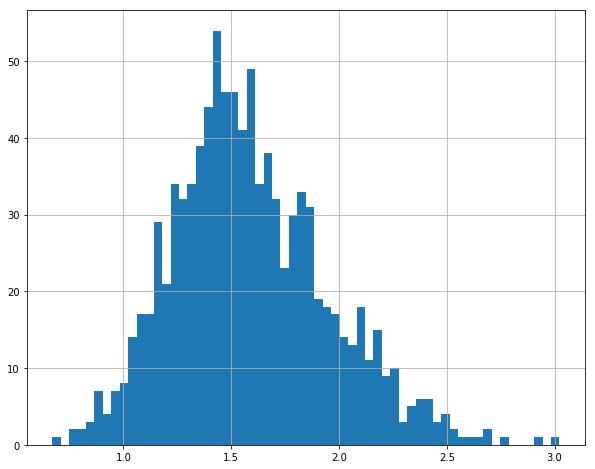

In [7]:
steps_df.hist(bins=60, figsize=((10,8)))

In [8]:
steps_df.to_csv('results/steps.csv')
minutes_MVPA_df.to_csv('results/mvpa.csv')